# Sentiment analysis
This notebook outlines calculating sentiment, applying sentiment to a dataframe and some basic visualization.

In [171]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

In [172]:
# Data for Sentiment analysis

def get_sentiment(message):
    ss = sid.polarity_scores(message)
    print(message)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')

print(get_sentiment('I love Joe, he is super cool'))
print(get_sentiment('Oh nuts, Joe is so lame. What a loser!'))

I love Joe, he is super cool
compound: 0.886, neg: 0.0, neu: 0.224, pos: 0.776, None
Oh nuts, Joe is so lame. What a loser!
compound: -0.8712, neg: 0.664, neu: 0.336, pos: 0.0, None


In [173]:
def get_pos(message):
    ss = sid.polarity_scores(message)
    return ss['pos']

def get_neu(message):
    ss = sid.polarity_scores(message)
    return ss['neu']

def get_neg(message):
    ss = sid.polarity_scores(message)
    return ss['neg']

def get_compound(message):
    ss = sid.polarity_scores(message)
    return ss['compound']

Borrowing our censorship for the other notebook.

In [174]:
# CONFIGURATION
# Names list - CHANGE THESE to include any personal names to remove.
names = { 
            'old_name' : 'new_name',
            'Joe' : 'J',
            'Dom' : 'D', 
}

# Censor list - CHANGE THESE to include any words you want to hide, I'd suggest including the above names.
censor_list = [
    ['word_to_be_censored','censored_word'],
    ['Joe','J'],
    ['Dom','D'],
]

In [175]:
# Read in CSV
df = pd.read_csv('output.csv',sep="|")
# convert to datetime
df['datetime']=pd.to_datetime(df['datetime'])
# Censor name and words

# Replace messages
def censor(message):
    message = str(message)
    for censor in censor_list:
        message = message.replace(censor[0],censor[1])
    
    return message

# remove any spaces
df['name'] = df['name'].str.strip()
# Replace names
df = df.replace(
    {
        'name' : names
    }
)

# censor all messages
df['message'] = df['message'].apply(censor)

# Drop rows with media messages
df = df[df['message'] != '<Media omitted>']

# Capitalize everything
df['message'] = df['message'].apply(lambda x: x.title())
df.head()

,datetime,name,message
0,2019-02-21 09:09:00,J,Hey Guys This Is It
1,2019-02-21 09:10:00,D,I’M There
2,2019-02-21 09:12:00,J,You'Re The Content Kid
3,2019-02-21 09:12:00,D,No You Are A Content Kid
4,2019-02-21 09:12:00,D,Haha Just Joking But That’S The Kind Of Banter...


In [184]:
# Calculate sentiment
df['pos'] = df['message'].apply(get_pos)
df['compound'] = df['message'].apply(get_compound)
df['neg'] = df['message'].apply(get_neg)
df['neu'] = df['message'].apply(get_neu)
df.head()

,datetime,name,message,pos,compound,neg,neu
0,2019-02-21 09:09:00,J,Hey Guys This Is It,0.000,0.0000,0.000,1.000
1,2019-02-21 09:10:00,D,I’M There,0.000,0.0000,0.000,1.000
2,2019-02-21 09:12:00,J,You'Re The Content Kid,0.000,0.0000,0.000,1.000
3,2019-02-21 09:12:00,D,No You Are A Content Kid,0.000,-0.2960,0.355,0.645
4,2019-02-21 09:12:00,D,Haha Just Joking But That’S The Kind Of Banter...,0.329,0.5994,0.000,0.671


In [185]:
df.groupby(['name']).mean()[['pos','neg']]

,pos,neg
name,,
A,0.162684,0.052558
C,0.192965,0.066683
D,0.152494,0.071822
J,0.189835,0.069696


In [186]:
posneg_df.head()

name,A,C,D,J
pos,1.000000,1.000000,1.00000,1.00000
neg,0.323066,0.345572,0.47098,0.36714


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a252ec128>,
      dtype=object)

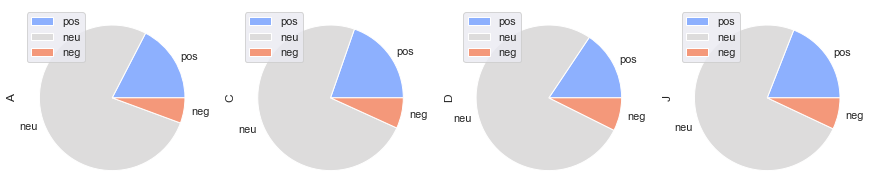

In [189]:
import seaborn as sns
sns.set()
sns.set_palette("coolwarm", 3)

# plot the ratios of positive to negative messages per person
posneg_df = df.groupby(['name']).mean()[['pos','neu','neg']].T
# normalize
posneg_df = posneg_df.apply(lambda x: x/x.max(), axis=0)

posneg_df.plot.pie(subplots=True, figsize=(15, 30))

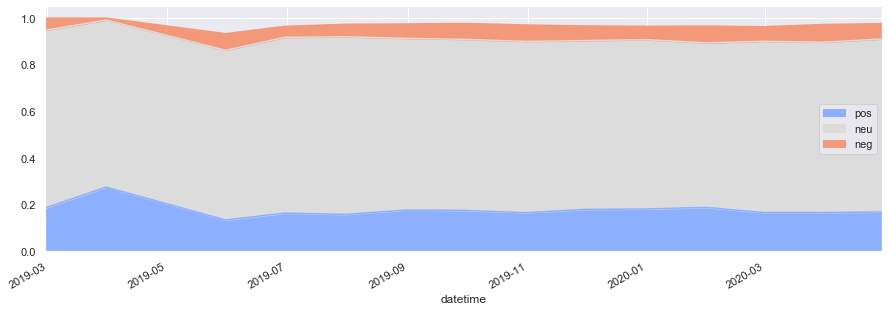

In [201]:
sns.set_palette("coolwarm", 3)
sentiment_df = df.set_index('datetime').groupby(pd.Grouper(freq='m')).mean().dropna(how='all')
sentiment_df.rolling(1).mean()[['pos','neu','neg']].plot(figsize=(15,5),kind='area')

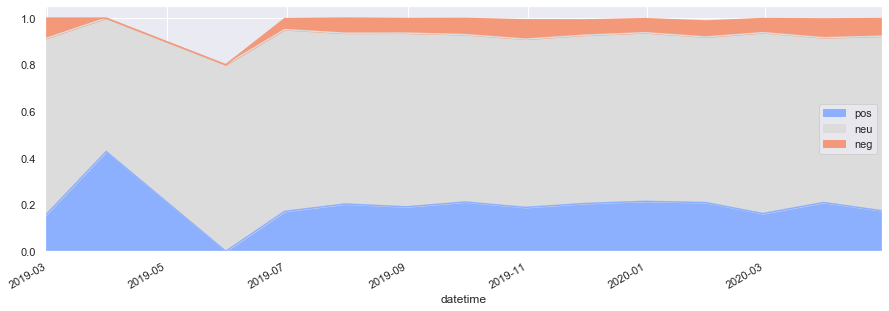

In [203]:
sentiment_df = df[df.name=='J'].set_index('datetime').groupby(pd.Grouper(freq='m')).mean().dropna(how='all')
sentiment_df.rolling(1).mean()[['pos','neu','neg']].plot(figsize=(15,5),kind='area')

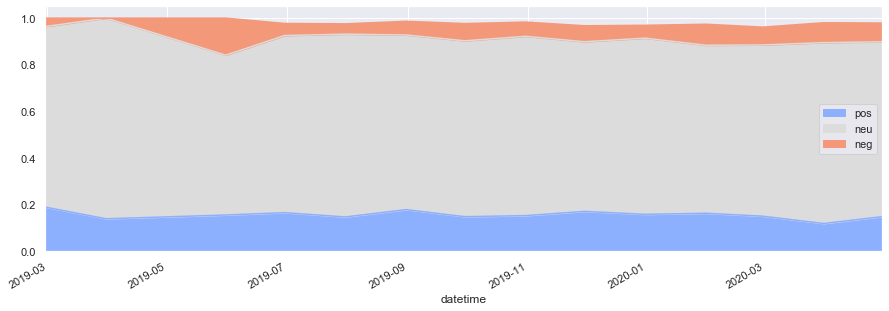

In [205]:
sentiment_df = df[df.name=='D'].set_index('datetime').groupby(pd.Grouper(freq='m')).mean().dropna(how='all')
sentiment_df.rolling(1).mean()[['pos','neu','neg']].plot(figsize=(15,5),kind='area')